# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

In [266]:
#Name: Namah Kumar
#StudentID: 47608811

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [270]:
import pandas as pd

data = pd.read_csv('loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [272]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [275]:
#QUESTION 1.1.1
data = data.dropna(thresh=len(data) *.5, axis='columns')

#QUESTION 1.1.2
Cat_Columns= data.select_dtypes(include=['object']).columns
data=data.dropna(subset=Cat_Columns)

#QUESTION 1.1.3
#Sort
Num_Columns=data.select_dtypes(include=['int','float']).columns
#mean of rows
data_mean=data[Num_Columns].mean()
#replace
data[Num_Columns] = data[Num_Columns].fillna(data_mean)

data.shape

(19900, 35)

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [277]:
#QUESTION 1.2.1
#finding unique values 
Cat_columns1= data.select_dtypes(include=['object']).columns
data = data.drop(columns=Cat_columns1[data[Cat_columns1].nunique() == len(data)])



#QUESTION 1.2.2
Cat_Columns2=data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=Cat_Columns2)


## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [280]:
#QUESTION 2.2.1
from sklearn.model_selection import train_test_split

y=data['LoanApproved']
X=data.drop(columns=['LoanApproved'])

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=47608811)

### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
#increase iterations
model= LogisticRegression(max_iter=5000)

# Create and train the linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
Test_predictions = model.predict(X_test)
Train_predictions = model.predict(X_train)

Test_accuracy=accuracy_score(y_test, Test_predictions)
Test_f1 = f1_score(y_test, Test_predictions)

Train_accuracy=accuracy_score(y_train, Train_predictions)
Train_f1=f1_score(y_train, Train_predictions)

print("Test Accuracy:",Test_accuracy)
print("--------------------------------------")
print("Test f1:",Test_f1)
print("--------------------------------------")
print("Train Accuracy:",Train_accuracy)
print("--------------------------------------")
print("Train f1:",Train_f1)

Test Accuracy: 0.8894472361809045
--------------------------------------
Test f1: 0.7477064220183486
--------------------------------------
Train Accuracy: 0.8891331658291457
--------------------------------------
Train f1: 0.7561817930653405


C:\Users\namah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [284]:
#QUESTION 2.2.3

# Selecting the 3 most relevant features [aid for this code was found on youtube (https://www.youtube.com/watch?v=vxdVKbAv6as)]
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
rfe.fit(X,y)

for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected = {rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected = False rank=9
AnnualIncome selected = False rank=11
CreditScore selected = False rank=3
Experience selected = False rank=24
LoanAmount selected = False rank=6
LoanDuration selected = False rank=10
NumberOfDependents selected = False rank=31
MonthlyDebtPayments selected = False rank=8
CreditCardUtilizationRate selected = False rank=12
NumberOfOpenCreditLines selected = False rank=25
NumberOfCreditInquiries selected = False rank=27
DebtToIncomeRatio selected = False rank=14
BankruptcyHistory selected = False rank=16
PreviousLoanDefaults selected = False rank=21
PaymentHistory selected = False rank=15
LengthOfCreditHistory selected = False rank=4
SavingsAccountBalance selected = False rank=18
CheckingAccountBalance selected = False rank=7
TotalAssets selected = False rank=5
TotalLiabilities selected = False rank=13
MonthlyIncome selected = True rank=1
UtilityBillsPaymentHistory selected = False rank=19
JobTenure selected = False rank=20
NetWorth selected = False rank=2
BaseI

In [285]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score

#Logistic Regression model [itterated 25 times for maximised accuracy with the least computing powered needed]
model = LogisticRegression(max_iter=25)

#Lists to store performance metrics
accuracy_scores = []
f1_scores = []
num_features = []

#Iterate through different numbers of features to retain
for n in range(1, X_train.shape[1] + 1):  # n ranges from 1 to the total number of features
    rfe = RFE(model, n_features_to_select=n)
    rfe.fit(X_train, y_train)

#Make predictions on the test set
    test_predictions = rfe.predict(X_test)

#Calculate accuracy and F1-Score
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)

#Store the results
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    num_features.append(n)



C:\Users\namah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\namah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

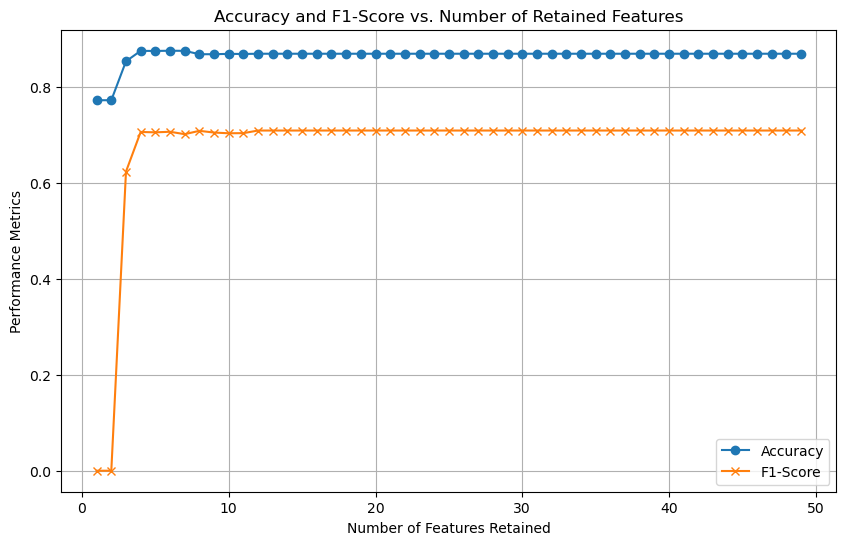

In [286]:

#Plot the performance metrics [in a separate box so the computer does not need to compute code every time graph needs to be altered]
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracy_scores, label='Accuracy', marker='o')
plt.plot(num_features, f1_scores, label='F1-Score', marker='x')
plt.xlabel('Number of Features Retained')
plt.ylabel('Performance Metrics')
plt.title('Accuracy and F1-Score vs. Number of Retained Features')
plt.legend()
plt.grid(True)
plt.show()

## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [289]:
#QUESTION 3.1.1->3.1.3

# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming 'X' are your selected features and 'y' is the target variable (Category)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a 1-NN classifier
knn_1nn = KNeighborsClassifier(n_neighbors=1)
knn_1nn.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = knn_1nn.predict(X_train)
y_test_pred = knn_1nn.predict(X_test)

# Calculate accuracy and F1-score for training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Output the metrics
print(f"Training Accuracy: {train_accuracy:.4f}")
print("-------------------------------------------")
print(f"Training F1-Score: {train_f1:.4f}")
print("-------------------------------------------")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("-------------------------------------------")
print(f"Testing F1-Score: {test_f1:.4f}")
print("-------------------------------------------")

# Compare and justify overfitting
if train_accuracy > test_accuracy:
    print("The model may be overfitting as the training accuracy is higher than testing accuracy.")
else:
    print("The model is not overfitting.")


Training Accuracy: 1.0000
-------------------------------------------
Training F1-Score: 1.0000
-------------------------------------------
Testing Accuracy: 0.8377
-------------------------------------------
Testing F1-Score: 0.8364
-------------------------------------------
The model may be overfitting as the training accuracy is higher than testing accuracy.


### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

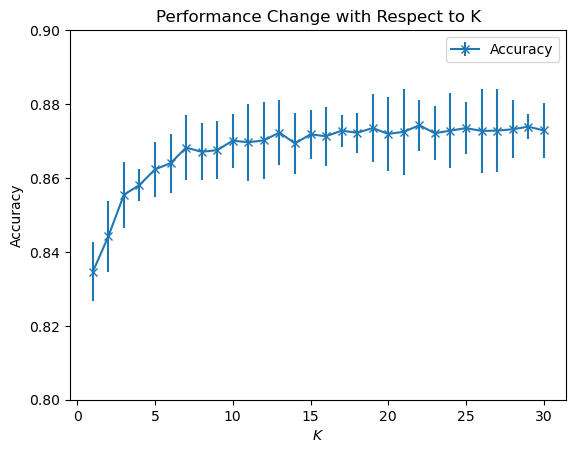

Best Model Testing Accuracy: 0.8807
-----------------------------------------------------------
Best Model Testing F1-Score: 0.8766


In [291]:
#QUESTION 3.2.1 -> 3.2.2
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

#K fold CV
cv_scores = []
cv_scores_std = []
k_range = range(1, 31)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.title('Performance Change with Respect to K')
plt.legend(loc='best')
plt.ylim(.8,0.9)
plt.show()


# Evaluate the best model on the testing data
best_knn = grid_search.best_estimator_
y_test_pred_best = best_knn.predict(X_test)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
test_f1_best = f1_score(y_test, y_test_pred_best, average='weighted')

print(f"Best Model Testing Accuracy: {test_accuracy_best:.4f}")
print("-----------------------------------------------------------")
print(f"Best Model Testing F1-Score: {test_f1_best:.4f}")

### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

Metric: euclidean
Accuracy: 0.8807
F1-Score: 0.8766
------------------------------
Metric: l1
Accuracy: 0.8741
F1-Score: 0.8697
------------------------------
Metric: cosine
Accuracy: 0.8633
F1-Score: 0.8597
------------------------------


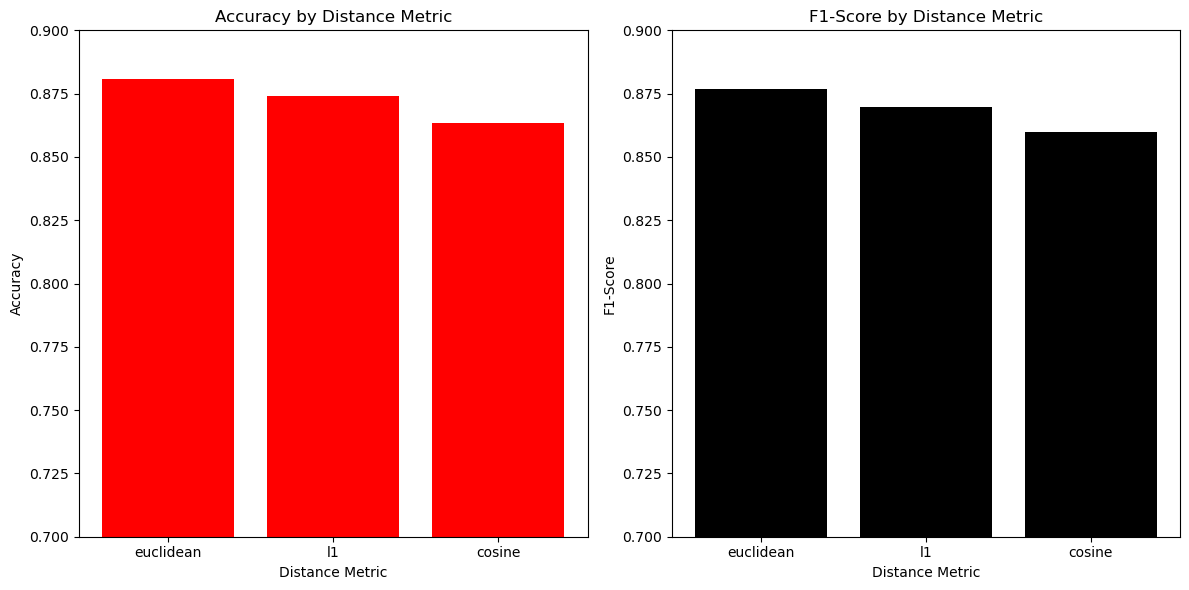

In [293]:
#QUESTION 3.3.1
# Import distance metrics and required libraries
from sklearn.metrics import make_scorer
import numpy as np

# Define the different distance metrics to test
distance_metrics = ['euclidean', 'l1', 'cosine']

# Store results for comparison
accuracy_results = []
f1_results = []

# Loop through each distance metric and evaluate the model performance
for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)
    
    # Predictions on the testing set
    y_test_pred = knn.predict(X_test)
    
    # Calculate accuracy and F1-score
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    accuracy_results.append(test_accuracy)
    f1_results.append(test_f1)
    
    print(f"Metric: {metric}")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"F1-Score: {test_f1:.4f}")
    print('-' * 30)

# Visualize the results with a bar chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy for each metric
ax[0].bar(distance_metrics, accuracy_results, color='red')
ax[0].set_title('Accuracy by Distance Metric')
ax[0].set_xlabel('Distance Metric')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.7,.9)

# Plot F1-score for each metric
ax[1].bar(distance_metrics, f1_results, color='black')
ax[1].set_title('F1-Score by Distance Metric')
ax[1].set_xlabel('Distance Metric')
ax[1].set_ylabel('F1-Score')
ax[1].set_ylim(0.7,.9)
plt.tight_layout()
plt.show()


In [294]:
#QUESTION 3.3.2
#comparing performances
# In order to accurately evaluate the performances of the different distance metrics, we must first
#establish what determines the best or worst score. The best score is one that has the highest accuracy and/ or lowest f1 score.
# Next, we may then establish that the worst score has the lowest accuracy and/ or has the highest f1 score. From this,
#we may determine that Euclidean has the best accuracy score of 0.8900 and the highest f1 of 0.8820.
# Cosine has the lowest accuracy of 0.8 and an f1 of 0.78. From this we can define the best distance metric as Euclidean and the worst as Cosine